<a href="https://colab.research.google.com/github/prnvvv/Machine-Learning/blob/main/LumpyDiseaseDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [4]:
file_path = "/content/Lumpy skin disease data.csv"
dataframe = pd.read_csv(file_path)
dataframe.head()

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


<Axes: ylabel='lumpy'>

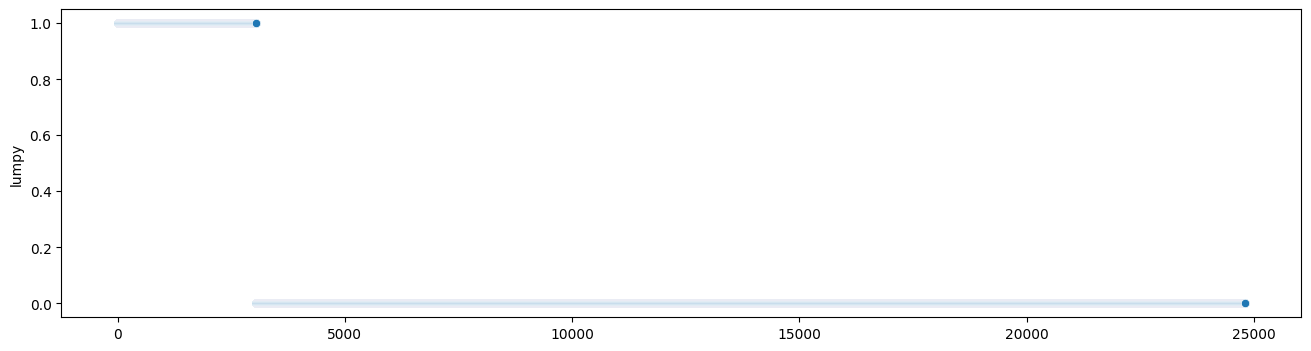

In [5]:
plt.figure(figsize=(16,4))
sns.scatterplot(data = dataframe.lumpy)

In [6]:
label = LabelEncoder()
region_encoded = label.fit_transform(dataframe["region"])
country_encoded = label.fit_transform(dataframe["country"])

In [7]:
dataframe["region_encoded"] = label.fit_transform(dataframe["region"])
dataframe["country_encoded"] = label.fit_transform(dataframe["country"])

In [8]:
dataframe.dropna(axis=0)

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,...,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy,region_encoded,country_encoded
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,...,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1,1,4
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,...,26.5,16.3,0.00,145,2,25063.646690,671.326701,1,1,16
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,...,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1,1,16
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,...,-9.7,0.9,4.64,178,2,760.703340,0.000000,1,1,8
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,...,-7.2,1.2,1.69,185,3,270.367426,0.000000,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,116.250072,27.093860,Asia,China,13-Jul-20,79.5,4.2,16.06,1.3,39.0,...,4.9,4.6,10.54,186,4,542.848939,351.593673,1,1,8
3035,118.447590,24.441660,Asia,China,10-Jul-20,72.4,5.8,1.91,1.8,10.0,...,12.9,8.5,5.03,145,2,985.615195,9.004950,1,1,8
3036,115.901111,25.936111,Asia,China,22-Jun-20,78.6,5.6,10.78,1.5,25.6,...,8.3,5.2,8.17,168,4,2034.519772,218.506148,1,1,8
3037,116.331818,25.536671,Asia,China,22-Jun-20,78.4,6.5,11.04,1.5,23.9,...,9.1,5.6,7.88,175,4,727.388390,147.268563,1,1,8


In [9]:
features = dataframe.columns.drop(['region','country', 'reportingDate', 'lumpy'])
X = dataframe[features]
y = dataframe.lumpy

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [11]:
DTC_model = DecisionTreeClassifier(random_state=1)
DTC_model.fit(X_train, y_train)
prediction = DTC_model.predict(X_test)

In [12]:
print(f"Accuracy : {accuracy_score(y_test, prediction)}")
print(f"R2_SCORE :  {r2_score(y_test, prediction): .2f}")

Accuracy : 1.0
R2_SCORE :   1.00


In [13]:
RFC_model = RandomForestClassifier(random_state=1)
RFC_model.fit(X_train, y_train)
prediction = RFC_model.predict(X_test)


In [14]:
print(f"Accuracy : {accuracy_score(y_test, prediction)}")
print(f"R2_SCORE :  {r2_score(y_test, prediction): .2f}")

Accuracy : 1.0
R2_SCORE :   1.00
